### 문제
1. corona.csv파일 로드
2. Unamed: 0 컬럼을 삭제
3. 컬럼을 첫번째부터 세번째까지 컬럼만 두고 전부 삭제
4. 컬럼의 이름을 변경 ['등록일시','누적사망자','누적확진자']
5. 등록일시를 기준으로 오름차순 정렬
6. 일일확진자와 일일사망자 파생변수 생성(결측치는 0으로 대체)
7. 일일 확진자가 음수인 값을 삭제
7. 등록일시를 시계열로 변경하고 인덱스 변경
8. 요일이라는 파생변수를 만들어서 요일 대입
9. 요일컬럼 0-> 월, 1->화,....6-> 일로 변경
10. 요일별 일일 확진자의 평균을 바 그래프로 표시
11. 요일별 일일 사망자의 평균을 바 그래프로 표시

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
# 3개의 컬럼만 불러오겠다, 시계열로 변경하겠다
df = pd.read_csv("../csv/corona.csv",usecols =[1,2,3])

In [3]:
df.columns = ['등록일시', '누적사망자', '누적확진자']
df

,등록일시,누적사망자,누적확진자
0,2022-06-08 09:09:05.982,24305,18188200
1,2022-06-07 09:09:00.897,24299,18174842
2,2022-06-06 09:00:06.734,24279,18168670
3,2022-06-05 08:53:19.426,24258,18163648
4,2022-06-04 08:56:49.219,24238,18153814
...,...,...,...
815,2020-03-14 00:00:00.000,72,8086
816,2020-03-13 00:00:00.000,67,7979
817,2020-03-12 00:00:00.000,66,7869
818,2020-03-11 00:00:00.000,60,7755


In [4]:
df.sort_values('등록일시', inplace=True)


In [5]:
df['일일확진자'] = df['누적확진자'].diff().fillna(0)
df['일일사망자'] = df['누적사망자'].diff().fillna(0)

In [6]:
df = df[df['일일확진자'] >= 0]

In [7]:
df['등록일시']= pd.to_datetime(df['등록일시'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 819 to 0
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   등록일시    819 non-null    datetime64[ns]
 1   누적사망자   819 non-null    int64         
 2   누적확진자   819 non-null    int64         
 3   일일확진자   819 non-null    float64       
 4   일일사망자   819 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 38.4 KB


C:\Users\bjw\AppData\Local\Temp\ipykernel_12852\2408224749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['등록일시']= pd.to_datetime(df['등록일시'])


In [8]:
df.set_index('등록일시', inplace=True)


In [9]:
df.index

DatetimeIndex([       '2020-03-10 00:00:00',        '2020-03-11 00:00:00',
                      '2020-03-12 00:00:00',        '2020-03-13 00:00:00',
                      '2020-03-14 00:00:00',        '2020-03-15 00:00:00',
                      '2020-03-16 00:00:00',        '2020-03-17 00:00:00',
                      '2020-03-18 00:00:00',        '2020-03-19 00:00:00',
               ...
               '2022-05-30 09:01:30.847000', '2022-05-31 08:55:39.977000',
               '2022-06-01 09:07:30.461000', '2022-06-02 08:58:19.746000',
               '2022-06-03 09:08:18.729000', '2022-06-04 08:56:49.219000',
               '2022-06-05 08:53:19.426000', '2022-06-06 09:00:06.734000',
               '2022-06-07 09:09:00.897000', '2022-06-08 09:09:05.982000'],
              dtype='datetime64[ns]', name='등록일시', length=819, freq=None)

In [10]:
for i in df.index:
    df.loc[i, '요일']= i.weekday()

C:\Users\bjw\AppData\Local\Temp\ipykernel_12852\167477372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i, '요일']= i.weekday()


In [11]:
df['요일'].value_counts

<bound method IndexOpsMixin.value_counts of 등록일시
2020-03-10 00:00:00.000    1.0
2020-03-11 00:00:00.000    2.0
2020-03-12 00:00:00.000    3.0
2020-03-13 00:00:00.000    4.0
2020-03-14 00:00:00.000    5.0
                          ... 
2022-06-04 08:56:49.219    5.0
2022-06-05 08:53:19.426    6.0
2022-06-06 09:00:06.734    0.0
2022-06-07 09:09:00.897    1.0
2022-06-08 09:09:05.982    2.0
Name: 요일, Length: 819, dtype: float64>

In [12]:
_list = df['요일'].astype(int).unique()

In [13]:
weekname = ['월','화','수','목','금','토','일']

for i in _list:
    df.loc[df['요일']==i,'요일'] =weekname[i]

In [14]:
df['요일'].value_counts()

화    118
수    118
금    117
토    117
일    117
목    116
월    116
Name: 요일, dtype: int64

In [15]:
import platform

if platform.system() == 'Darwin':
    plt.rc('font',family ='AppleGothic')
else:
    plt.rc('font',family ='Malgun Gothic')

<Axes: xlabel='요일'>

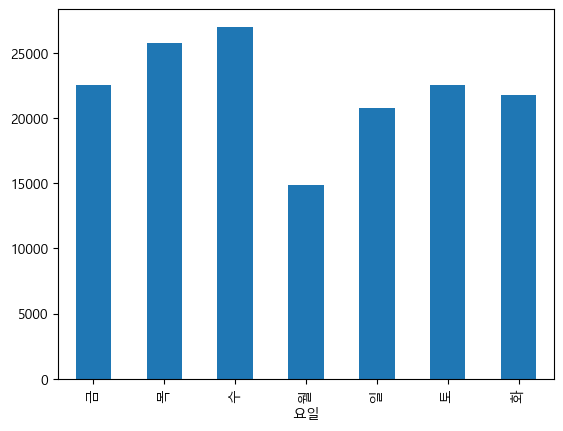

In [16]:
df.groupby('요일')['일일확진자'].mean().plot.bar()

<Axes: xlabel='요일'>

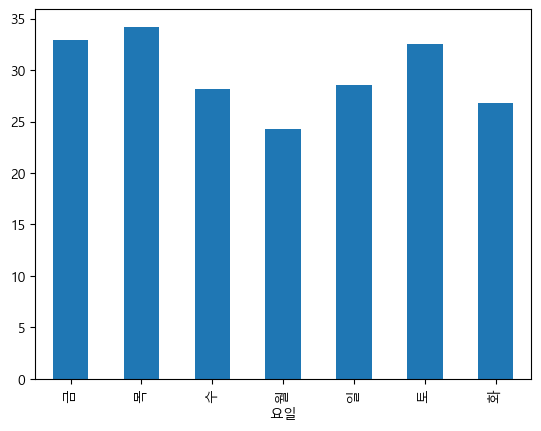

In [17]:
df.groupby('요일')['일일사망자'].mean().plot.bar()